# Finding the Best Markets to Advertise an E-learning Product

This project aims to find the two best markets to advertise for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but  also cover many other domains, like data science, game development, etc.

## Understanding the Data
Instead of a survey, the project will make use of existing data to determine whether any definite or reliable results can be obtained.

One good candidate for this purpose is [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of this analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). More information on the dataset is available in the raw-data folder [the repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

First, a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of [the repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
#importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

fcc.info()
fcc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for Sample Representativity
As mentioned in the introduction, most of the courses are on web and mobile development, but also cover many other domains, like data science, game development, etc. For the purpose of this analysis, the objective is to answer the following questions about a population of new coders that are interested in the subjects taught:

- Where are these new coders located?
- What countries have the greatest densities of new coders?
- How much money they're willing to spend on learning?

So first clarification on whether the data set has the right categories of people for this purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So a look at the frequency distribution table of this column will help determine whether the data we have is relevant.

In [3]:
fcc.JobRoleInterest.value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

In [20]:
# Splitting each string in the 'JobRoleInterest' column
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # determinine number of options in list job options

n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

31.7% of the participants have a clear idea about one programming niche they'd like to work in, while the majority of students have mixed interests in 2 or more areas.

The focus of the company's courses is  web and mobile development, so how many respondents chose at least one of these two options?

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


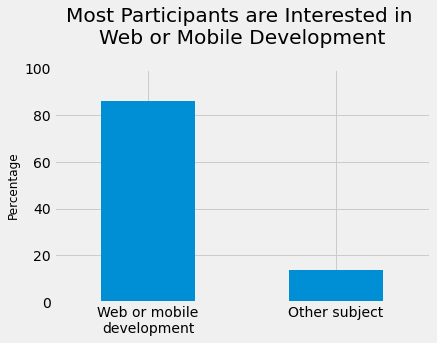

In [5]:
# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer a strong reason to consider this sample representative for our population of interest. The goal is to advertise  courses to people interested in all sorts of programming niches but mostly web and mobile development.

Again, to determine the best markets to invest money in for advertising the company's courses the following questions could be answered:

- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

## Location of New Coders

For each location what are the densities (how many new coders there are)?

The data set provides information about the location of each participant at a country level. Each country can be thought of as an individual market, so the goal can be framed as finding the two best countries to advertise in.

The frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). Henceforth only those participants who answered what role(s) they're interested in will be considered, to make sure the analysis is based on a representative sample.

In [6]:
# Isolate the participants that answered what role they'd be interested in
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


45.7% of potential customers are located in the US, and this definitely seems like the most interesting market. India has the second highest customer density, with 7.7%, which is not too far from the United Kingdom (4.6%) and Canada (3.8%).

This is useful information, but to be more definite, it is necessary to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable.

## How much money are new coders actually willing to spend on learning?

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. The company sells subscriptions at a price of $59 per month, and for this reason the analysis should figure out how much money each student spends per month.

It also seems like a good idea to narrow down the analysis to only the four countries with the highest customer density: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies, which means there is a decent amount of data for each.
- The company's courses are written in English, and English is an official language in all these four countries. The more people that know English, the better the chances to target the right people with ads.

In [7]:
fcc_good['MonthsProgramming'] = fcc_good['MonthsProgramming'].replace(0, 1) 
fcc_good['money_spent'] = fcc_good['MoneyForLearning']/fcc_good['MonthsProgramming']
fcc_good['money_spent'].value_counts(dropna=False)

0.000000       3092
NaN             675
50.000000       128
25.000000       120
16.666667       118
               ... 
875.000000        1
67.500000         1
1350.000000       1
185.714286        1
297.000000        1
Name: money_spent, Length: 494, dtype: int64

In [8]:
top_countries = ['United States of America','India', 'United Kingdom',
                            'Canada']
# keeping only non-null values
fcc_good = fcc_good[fcc_good['money_spent'].notnull()]
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

#grouping data by CountryLive column Mean sum of money spent by students each month
fcc_by_country = fcc_good.groupby('CountryLive').mean()

fcc_by_country['money_spent'][top_countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_spent, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. Considering a few socio-economical metrics (like GDP per capita), you'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that the dataset doesn't have have enough representative data for the United Kingdom and Canada, or has some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada.

## Identifying Extreme Outliers
Box plots are used her to visualize the distribution of the money_per_month variable for each country to eaisly identify the outliers.

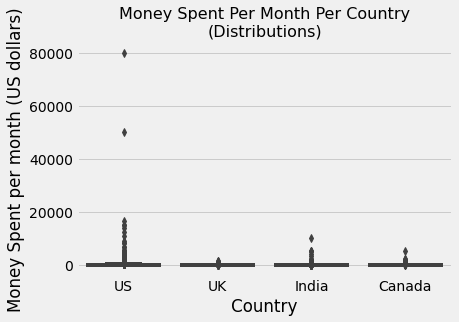

In [9]:
# Isolate only the countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].isin(top_countries)]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_spent', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money Spent per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but its clear that there's something really off for the US: two persons spend each month &#36; 50,000 or more for learning. This is not impossible, but it seems extremely unlikely, so every value that goes over &#36; 20,000 per month will be dropped.

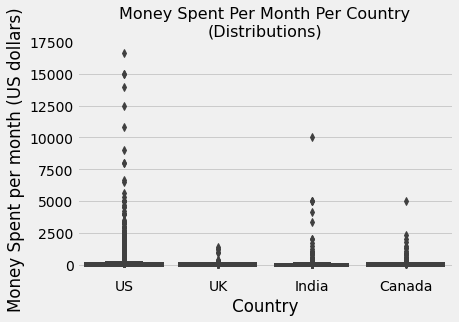

In [10]:
only_4 = only_4[only_4['money_spent'] < 20000]

# Box plots to visualize distributions
sns.boxplot(y = 'money_spent', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money Spent per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There are a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. These two data points should be examined to see if  there's anything relevant.

In [11]:
# Inspecting the extreme outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_spent'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_spent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [12]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # using the row labels

In [13]:
# Inspecting the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spent'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_spent
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp should be removed.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, these will be removed too.

In the next code block, the following outliers should be removed. US Respondents that spent more than 6000 and:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [14]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spent'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)]
only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_spent'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]
only_4 = only_4.drop(less_than_3_months.index)

Looking again at the last box plot above, there is also an extreme outlier for Canada — a person who spends roughly $5000 per month. 

In [15]:
canada_outliers = only_4[(only_4['CountryLive'] == 'Canada') &
                        (only_4['money_spent'] > 4800)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_spent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. The same approach is taken here and this outlier is removed.

In [16]:
only_4 = only_4.drop(canada_outliers.index)

In [17]:
# Reviewing mean amount of money spent by students each month
only_4.groupby('CountryLive').mean()['money_spent'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: money_spent, dtype: float64

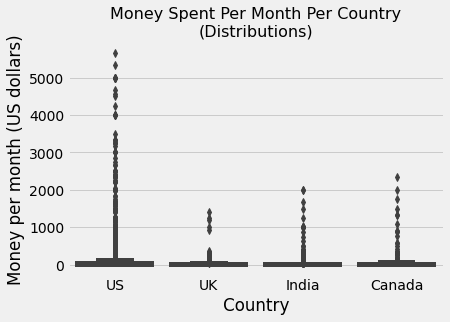

In [18]:
# Visualizing the distributions again
sns.boxplot(y = 'money_spent', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Two Best Markets
Obviously, one country that should be advertises in is the US. Lots of new coders live there and are willing to pay a good amount of money each month (roughly &#36; 183).

The client sells subscriptions at a price of &#36; 59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly &#36; 93 per month, compared to India (&#36; 66) and the United Kingdom (&#36; 45).

The data suggests strongly that ads shouldn't be placed in the UK, but taking a second look at India before deciding to choose Canada as the second best choice shows that:

&#36; 59 doesn't seem like an expensive sum for people in India since they spend on average &#36; 66 each month and there are almost twice as more potential customers in India than in Canada.

In [19]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that there are several options:

* Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    * 60% for the US, 25% for India, 15% for Canada.
    * 50% for the US, 30% for India, 20% for Canada; etc.


* Advertise only in the US and India or Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    * 70% for the US, and 30% for India.
    * 65% for the US, and 35% for Canada; etc.


* Advertise only in the US.

At this point, it's probably best to send the analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to analyzing the new survey data.